pip install duecredit




https://sites.google.com/site/bctnet/list-of-measures?authuser=0

In [164]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob

import brainconn

Networks name : Functional Connectivity (100parcels)

Dataset(Cohert) : UCLA_CNP, COBRE, Decnef

Networks type : undirected, weighted, signed

In [165]:
UCLACNP_list=[]
COBRE_list=[]
Decnef_list=[]
Total_list=[]

file_list = glob.glob('data/UCLA_CNP/*.npy')
for subj in file_list:
    temp = subj.replace('data/','')
    temp = temp.replace('.npy', '')
    UCLACNP_list.append(temp)
    
file_list = glob.glob('data/COBRE/*.npy')
for subj in file_list:
    temp = subj.replace('data/','')
    temp = temp.replace('.npy', '')
    COBRE_list.append(temp)
    
file_list = glob.glob('data/Decnef/*.npy')
for subj in file_list:
    temp = subj.replace('data/','')
    temp = temp.replace('.npy', '')
    Decnef_list.append(temp)

In [166]:
local_measure_dict={
    'betweenness': pd.DataFrame(),
    'eigenvector_centrality': pd.DataFrame(),
    'node_degree': pd.DataFrame(),
    'strength': pd.DataFrame(),
    'clustering_coefficient': pd.DataFrame(),
}

global_measure_dict={
}

In [173]:
class Network(object):
    def __init__(self, corr):
        self.corr = corr

        self.betweenness=None
        self.eigenvector_centrality=None
        self.node_degree=None
        self.strength=None
        self.clustering_coefficient=None

    def compute_local_graph_measures(self): #(100,)
        self.betweenness = brainconn.centrality.betweenness_wei(corr)
        self.eigenvector_centrality = brainconn.centrality.eigenvector_centrality_und(corr)
        self.node_degree = brainconn.degree.degrees_und(corr)
        self.strength = brainconn.degree.strengths_und(corr)
        self.clustering_coefficient = brainconn.clustering.clustering_coef_wu(corr)
        # self.local_efficiency = brainconn.distance.efficiency_wei(corr) # () shape
    
    def compute_global_graph_measures(self): #(1,)
        global_efficiency = brainconn.distance.charpath(corr) # len 5 tuple
        
    def apped_measures_df(self, local_measure_dict, global_measure_dict):
        local_measure_dict['betweenness'] = pd.concat([local_measure_dict['betweenness'], pd.DataFrame(self.betweenness.reshape(-1,100))], ignore_index=True)
        local_measure_dict['eigenvector_centrality'] = pd.concat([local_measure_dict['eigenvector_centrality'], pd.DataFrame(self.eigenvector_centrality.reshape(-1,100))], ignore_index=True)
        local_measure_dict['node_degree'] = pd.concat([local_measure_dict['node_degree'], pd.DataFrame(self.node_degree.reshape(-1,100))], ignore_index=True)
        local_measure_dict['strength'] = pd.concat([local_measure_dict['strength'], pd.DataFrame(self.strength.reshape(-1,100))], ignore_index=True)
        local_measure_dict['clustering_coefficient'] = pd.concat([local_measure_dict['clustering_coefficient'], pd.DataFrame(self.clustering_coefficient.reshape(-1,100))], ignore_index=True)

In [174]:
for subj in UCLACNP_list:
    corr = np.load(f'data/{subj}.npy') # correlation matrix should be zero diagonal
    network = Network(corr)
    network.compute_local_graph_measures()
    network.apped_measures_df(local_measure_dict, global_measure_dict)

In [181]:
ROI0=local_measure_dict['betweenness'].iloc[:, 0] # subject들의 한 ROI에서의 measure
ROI0

0      1614.0
1      3525.0
2       805.0
3      1436.0
4      4058.0
        ...  
254     588.0
255    1512.0
256    1776.0
257    3680.0
258    1065.0
Name: 0, Length: 259, dtype: float64

<Axes: >

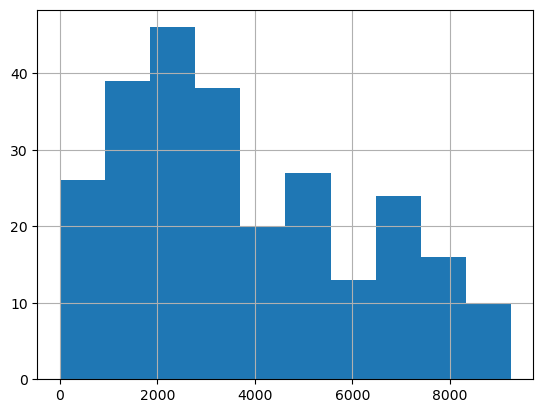

In [182]:
ROI0.hist()

In [194]:
def local_ROI_distribution(local_measure_dict, measure): 
    for ROI_idx in range(3):
        ROI = local_measure_dict[measure].iloc[:, ROI_idx]
        ROI.hist()

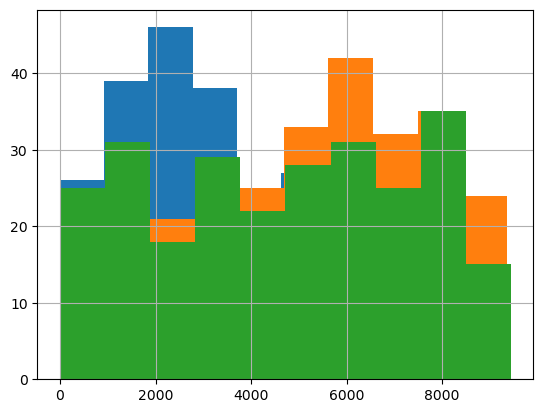

In [195]:
local_ROI_distribution(local_measure_dict, measure='betweenness')

In [ ]:
# # brainconn에는 있지만 bctpy에는 없는 것
# brainconn.modularity.ci2ls
# brainconn.modularity.ls2ci
# brainconn.modularity.modularity_dir
# brainconn.modularity.modularity_finetune_dir
# brainconn.modularity.modularity_finetune_und
# brainconn.modularity.modularity_finetune_und_sign
# brainconn.modularity.modularity_louvain_dir
# brainconn.modularity.modularity_louvain_und
# brainconn.modularity.modularity_louvain_und_sign
# brainconn.modularity.modularity_probtune_und_sign
# brainconn.modularity.modularity_und_sign
# brainconn.modularity.partition_distance
# brainconn.nbs.Doi
# brainconn.nbs.nbs_bct
# brainconn.reference.latmio_dir
# brainconn.reference.latmio_dir_connected
# brainconn.reference.latmio_und
# brainconn.reference.latmio_und_connected
# brainconn.reference.makeevenCIJ
# brainconn.reference.makefractalCIJ
# brainconn.reference.makerandCIJ_und
# brainconn.reference.makerandCIJdegreesfixed
# brainconn.reference.makeringlatticeCIJ
# brainconn.reference.maketoeplitzCIJ
# brainconn.reference.null_model_dir_sign
# brainconn.reference.null_model_und_sign
# brainconn.reference.randmio_dir
# brainconn.reference.randmio_dir_connected
# brainconn.reference.randmio_dir_signed
# brainconn.reference.randmio_und
# brainconn.reference.randmio_und_connected
# brainconn.reference.randmio_und_signed
# brainconn.reference.randomize_graph_partial_und
# brainconn.reference.randomizer_bin_und
# brainconn.similarity.corr_flat_dir
# brainconn.similarity.corr_flat_und
# brainconn.similarity.dice_pairwise_und

# # bctpy에는 있지만 brainconn에는 없는 것
# Diffusion efficiency
# Navigation
# quasi_idempotence

In [115]:
# small-worldness
# resilience

# community_structure_modularity_sign_louvian = brainconn.modularity.community_louvain(corr)
# community_structure_modularity_link = brainconn.modularity.link_communities(corr)
# community_structure_modularity_spectral = brainconn.modularity.modularity_und(corr)
# consensus_partitioning = brainconn.clustering.consensus_und(corr) # input : partitions of networks
# modularity_degeneracy = brainconn.clustering.agreement(corr) # input : partitions of networks
# modularity_degeneracy_wei = brainconn.clustering.agreement_weighted(corr) # input : partitions of networks
# edg_betw_wei = brainconn.centrality.edge_betweenness_wei(corr)[0] #(100, 100)
# eigenvector_centrality_pagerank = brainconn.centrality.pagerank_centrality(corr)
# within_module_degree_zscore_link = brainconn.centrality.module_degree_zscore(corr, community_structure_modularity_link)
# within_module_degree_zscore_spectral = brainconn.centrality.module_degree_zscore(corr, community_structure_modularity_spectral)
# participation_coef_link = brainconn.centrality.participation_coef(corr, community_structure_modularity_link)
# participation_coef_spectral = brainconn.centrality.participation_coef(corr, community_structure_modularity_spectral)
# participation_coef_sign = brainconn.centrality.participation_coef_sign(corr, community_structure_modularity_sign_louvian)
# participation_coef_sign_gateway = brainconn.centrality.gateway_coef_sign(corr, community_structure_modularity_sign_louvian)
# participation_coef_sign_diversity = brainconn.centrality.diversity_coef_sign(corr, community_structure_modularity_sign_louvian)
# strength_sign = brainconn.degree.strengths_und_sign(corr) # len 4 tuple
# clustering_coefficient_sign = brainconn.clustering.clustering_coef_wu_sign(corr) # len 2 tuple
# transitivity = brainconn.clustering.transitivity_wu(corr) # () shape
# consensus_partitioning = brainconn.clustering.consensus_und(corr) # input : partitions of networks
# modularity_degeneracy = brainconn.clustering.agreement(corr) # input : partitions of networks
# modularity_degeneracy_wei = brainconn.clustering.agreement_weighted(corr) # input : partitions of networks
# assortativity = brainconn.core.assortativity_wei(corr) # () shape
# core_periphery = brainconn.core.core_periphery_dir(corr) # len 2 tuple
# assortativity_sign = brainconn.core.local_assortativity_wu_sign(corr) # len 2 tuple
# rich_club_coefficient = brainconn.core.rich_club_wu(corr) #(99,)
# s_core = brainconn.core.score_wu(corr) # s필요
# distance = brainconn.distance.distance_wei(corr) # input : mapping from weight to distance (usually weight inversion)
# distance_floydwarshall = brainconn.distance.distance_wei_floyd(corr) # input : mapping from weight to distance (usually weight inversion), or may be the native weights matrix (in which case a weight transform to distance must be specified as the input).
# mean_first_passage_time = brainconn.distance.mean_first_passage_time(corr) # (100,100)
# shortest_path = brainconn.distance.retrieve_shortest_path(corr) # t, hops, pmat 필요
# density = brainconn.physical_connectivity.density_und(corr)  # len 3 tuple